In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#显示所有列
pd.set_option('display.max_columns',None)

In [2]:
data = pd.read_csv('G:/shuju/tianchi/二手车交易价格/used_car_train_20200313.csv',sep = ' ')
data

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,0,0,20160404,1850,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,-,4366,0,0,20160309,3600,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,0.0,2806,0,0,20160402,6222,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,0.0,434,0,0,20160312,2400,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,0.0,6977,0,0,20160313,5200,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,0.0,4576,0,0,20160327,5900,45.316543,-3.139095,-1.269707,-0.736609,-1.505820,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,0.0,2826,0,0,20160312,9500,45.972058,-3.143764,-0.023523,-2.366699,0.698012,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,0.0,3302,0,0,20160328,7500,44.733481,-3.105721,0.595454,-2.279091,1.423661,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,0.0,1877,0,0,20160401,4999,45.658634,-3.204785,-0.441680,-1.179812,0.620680,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014


In [3]:
#step2.EDA
#数据探索，查看列的取值
def list_dif_value(data):
    columns_list = data.columns.tolist()
    for i in columns_list:
        print(i,'的不同取值为：',data[i].unique(),i,'的不同值个数：',len(data[i].unique()),data[i].dtype)
list_dif_value(data)

SaleID 的不同取值为： [     0      1      2 ... 149997 149998 149999] SaleID 的不同值个数： 150000 int64
name 的不同取值为： [   736   2262  14874 ... 147587  45907 177672] name 的不同值个数： 99662 int64
regDate 的不同取值为： [20040402 20030301 20040403 ... 20150011 19911011 19911211] regDate 的不同值个数： 3894 int64
model 的不同取值为： [ 30.  40. 115. 109. 110.  24.  13.  26.  19.   7.   1.  48.  65. 138.
 105. 114.   0.   8.  78.  21.   3.   4.  31. 121.  75.  17. 107.  16.
 111.  47.   5.  44. 200. 155.  87.  20.  22.  63.  49.  29.  88.  60.
  73.  39.  23.  11.  69. 167. 199. 178. 101.   6.  10.  57.  33.  32.
  52.  46.  74.  93. 125.  41. 127. 104.  98.  68. 156. 116. 170. 160.
  85.  80. 143.  77. 166.  53.  66. 203.  14.  42. 119. 174. 177. 210.
  36. 238.  70.  58. 126.  84.  97. 108. 192.  64.  15.  95.  54. 142.
  55. 218. 222. 163.  76.  83. 122.  18. 124. 106.  59. 228. 164. 165.
 145.  94. 186. 220. 179.  67.  71.  25. 144. 212. 172. 168. 206. 152.
 123. 182.  38. 117. 132.  99. 183. 219.  62. 173.  82.  34. 102. 2

v_14 的不同取值为： [ 0.9147625   0.24552241 -0.22996286 ... -0.27216033 -1.65901428
 -0.34267435] v_14 的不同值个数： 143998 float64


In [4]:
data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.0,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,2583.077267,0.000007,0.0,2.016033e+07,5923.327333,44.406268,-0.044809,0.080765,0.078833,0.017875,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,1885.363218,0.002582,0.0,1.067328e+02,7501.998477,2.457548,3.641893,2.929618,2.026514,1.193661,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.0,2.015062e+07,11.000000,30.451976,-4.295589,-4.470671,-7.275037,-4.364565,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,1018.000000,0.000000,0.0,2.016031e+07,1300.000000,43.135799,-3.192349,-0.970671,-1.462580,-0.921191,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,2196.000000,0.000000,0.0,2.016032e+07,3250.000000,44.610266,-3.052671,-0.382947,0.099722,-0.075910,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,3843.000000,0.000000,0.0,2.016033e+07,7700.000000,46.004721,4.000670,0.241335,1.565838,0.868758,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,8120.000000,1.000000,0.0,2.016041e+07,99999.000000,52.304178,7.320308,19.035496,9.854702,6.829352,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [5]:
data = data.fillna(data.median())
data

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,0,0,20160404,1850,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,-,4366,0,0,20160309,3600,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,0.0,2806,0,0,20160402,6222,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,0.0,434,0,0,20160312,2400,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,0.0,6977,0,0,20160313,5200,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,0.0,4576,0,0,20160327,5900,45.316543,-3.139095,-1.269707,-0.736609,-1.505820,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,0.0,2826,0,0,20160312,9500,45.972058,-3.143764,-0.023523,-2.366699,0.698012,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,0.0,3302,0,0,20160328,7500,44.733481,-3.105721,0.595454,-2.279091,1.423661,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,0.0,1877,0,0,20160401,4999,45.658634,-3.204785,-0.441680,-1.179812,0.620680,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014


In [6]:
data['notRepairedDamage'].replace('-',np.nan,inplace = True)
data['model'].replace(np.nan,data['model'].median())
data['notRepairedDamage'] = data['notRepairedDamage'].astype('float64')

In [7]:
"""
#缺失值填补,特殊值替代，bodyType 、fuelType、gearbox、model有缺失值，
data.isnull().sum()
data['notRepairedDamage'].replace('-',999,inplace = True)
data['notRepairedDamage'] = data['notRepairedDamage'].astype('float64')
data['bodyType'].replace(np.nan,999,inplace = True)
data['fuelType'].replace(np.nan,999,inplace = True)
data['gearbox'].replace(np.nan,999,inplace = True)
data['model'].replace(np.nan,data['model'].median(),inplace = True)
"""


"\n#缺失值填补,特殊值替代，bodyType 、fuelType、gearbox、model有缺失值，\ndata.isnull().sum()\ndata['notRepairedDamage'].replace('-',999,inplace = True)\ndata['notRepairedDamage'] = data['notRepairedDamage'].astype('float64')\ndata['bodyType'].replace(np.nan,999,inplace = True)\ndata['fuelType'].replace(np.nan,999,inplace = True)\ndata['gearbox'].replace(np.nan,999,inplace = True)\ndata['model'].replace(np.nan,data['model'].median(),inplace = True)\n"

In [8]:
data

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,0,0,20160404,1850,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,NaN,4366,0,0,20160309,3600,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,0.0,2806,0,0,20160402,6222,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,0.0,434,0,0,20160312,2400,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,0.0,6977,0,0,20160313,5200,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,0.0,4576,0,0,20160327,5900,45.316543,-3.139095,-1.269707,-0.736609,-1.505820,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,0.0,2826,0,0,20160312,9500,45.972058,-3.143764,-0.023523,-2.366699,0.698012,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,0.0,3302,0,0,20160328,7500,44.733481,-3.105721,0.595454,-2.279091,1.423661,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,0.0,1877,0,0,20160401,4999,45.658634,-3.204785,-0.441680,-1.179812,0.620680,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null int64
model                150000 non-null float64
brand                150000 non-null int64
bodyType             150000 non-null float64
fuelType             150000 non-null float64
gearbox              150000 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    125676 non-null float64
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4      

SaleID              -0.000431
name                -0.030872
regDate              0.779349
model                0.102137
brand               -0.102716
bodyType             0.198099
fuelType             0.343288
gearbox              0.310503
power                0.577343
kilometer           -0.409778
notRepairedDamage   -0.313341
regionCode           0.006297
seller              -0.004433
offerType                 NaN
creatDate            0.020802
price                1.000000
v_0                  0.873225
v_1                  0.150472
v_2                  0.597624
v_3                 -0.925305
v_4                 -0.149911
v_5                  0.353681
v_6                  0.423424
v_7                  0.021379
v_8                  0.836034
v_9                 -0.235606
v_10                -0.507179
v_11                -0.410023
v_12                 0.860065
v_13                 0.052532
v_14                 0.189175
Name: price, dtype: float64


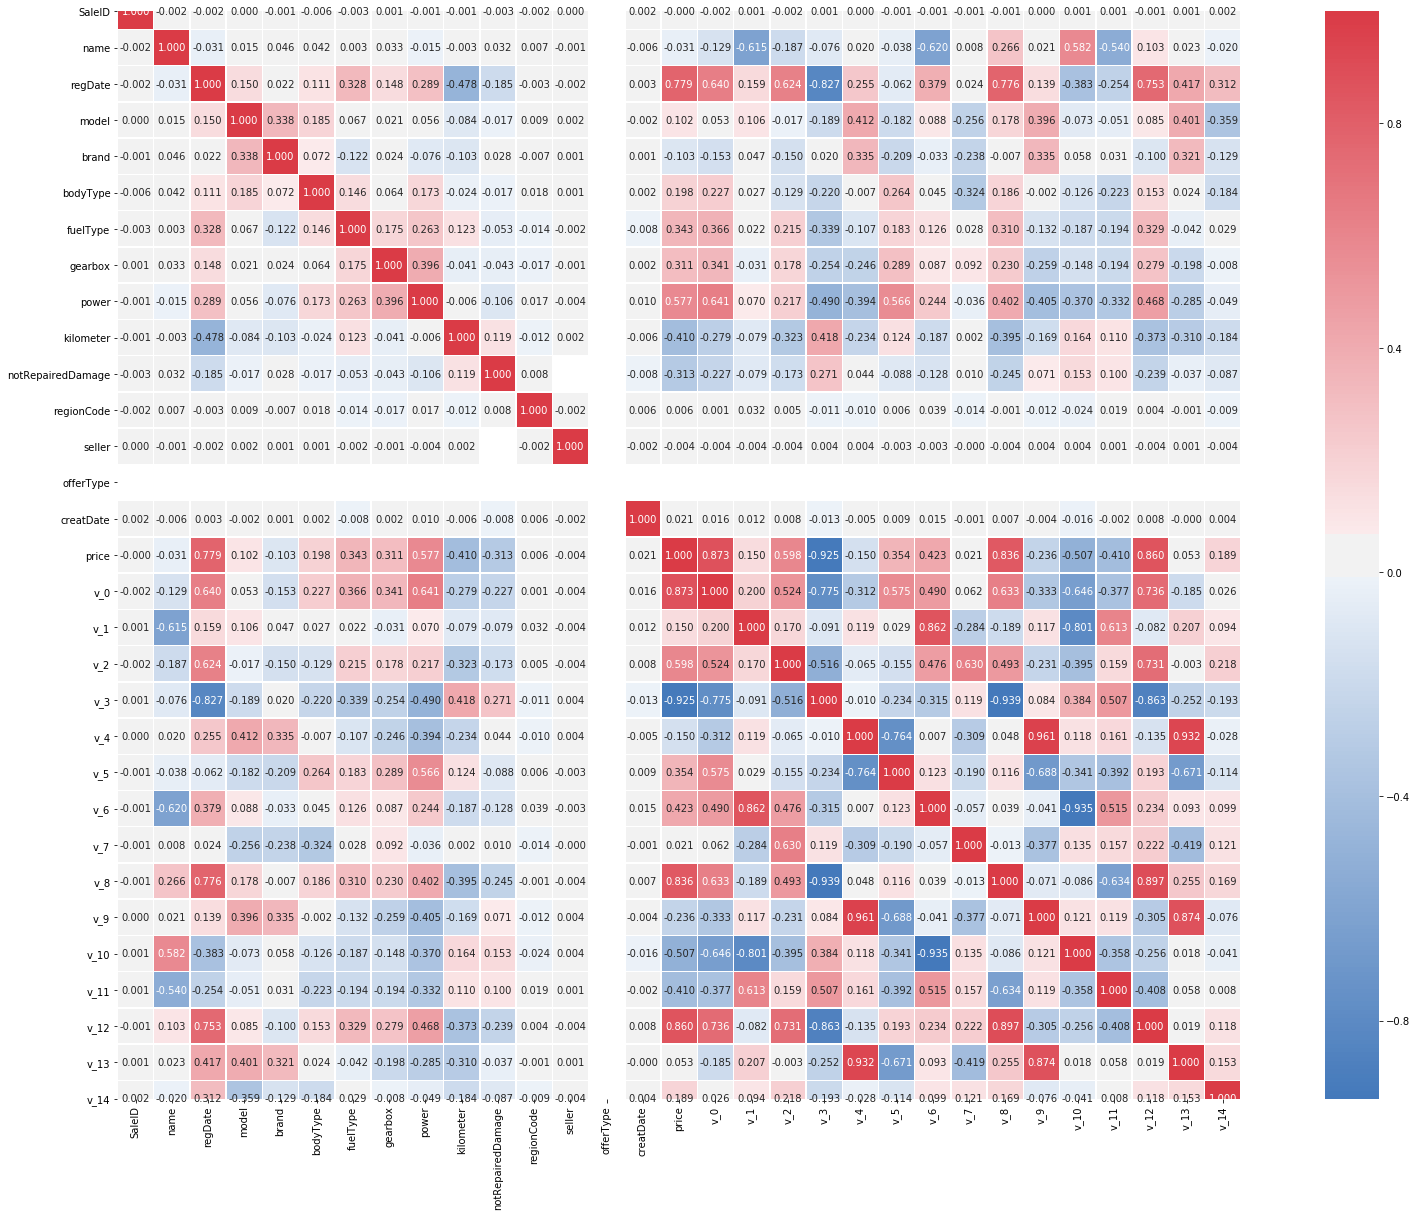

In [10]:
#热力图
def plt_data_heatmap(data):
    plt.figure(figsize = (30,20))
    corr = data.corr(method = 'spearman')
    print(corr['price'])
    mask = np.zeros_like(corr,dtype = np.bool)
    cmap = sns.diverging_palette(h_neg=250,h_pos = 10,as_cmap = True)
    g = sns.heatmap(data=corr,cmap = cmap,mask = mask,linewidth=.5,square = True,annot = True,fmt = '0.3f')
    plt.show()
plt_data_heatmap(data)

In [11]:
"""
#删除与price相关系数小于阈值的变量
def filter_variable(data,threshold):
    corr = data.corr(method = 'spearman')
    columns = corr[(corr['price']>threshold)].index.tolist()
    columns.insert(0,'SaleID')
    return data[columns]
data = filter_variable(data = data,threshold = 0.01)
data
"""

"\n#删除与price相关系数小于阈值的变量\ndef filter_variable(data,threshold):\n    corr = data.corr(method = 'spearman')\n    columns = corr[(corr['price']>threshold)].index.tolist()\n    columns.insert(0,'SaleID')\n    return data[columns]\ndata = filter_variable(data = data,threshold = 0.01)\ndata\n"

In [12]:
print(min(data['regDate']))
print(min(data['creatDate']))

19910001
20150618


In [13]:
#时间做成时间戳
temp = pd.to_datetime(data['regDate'],format ='%Y%m%d',errors = 'coerce')
min_date = pd.to_datetime('19910101',format = '%Y%m%d')
data['regDate'] = (temp -min_date).dt.days
temp = pd.to_datetime(data['creatDate'],format ='%Y%m%d',errors = 'coerce')
min_date = pd.to_datetime('20150618',format = '%Y%m%d')
data['creatDate'] = (temp -min_date).dt.days

In [14]:
#特征
data = data.fillna(data.median())
feature = data.columns.tolist()
feature.remove('price')
feature.remove('offerType')

In [15]:
a = [1,2,3]

In [16]:
#特征归一化
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
x = min_max_scaler.fit_transform(data[feature].values)
y = data['price']

In [17]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
x = min_max_scaler.fit_transform(data[feature])
y = data['price']

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [19]:
import lightgbm as lgbm
from sklearn.metrics import mean_absolute_error
model_lgbm = lgbm.LGBMRegressor()
model_lgbm.fit(x_train,y_train)
pred_lgbm = model_lgbm.predict(x_test)
MAE = mean_absolute_error(y_test,pred_lgbm)
print('MAE为：',MAE)

MAE为： 721.8856741807027


In [20]:
from tensorflow import keras

In [21]:
#搭建网络
model_k = keras.Sequential([
    keras.layers.Dense(250,activation = 'relu',input_shape = [len(feature)]),
    keras.layers.Dense(250,activation = 'relu'),
    keras.layers.Dense(250,activation = 'relu'),
    keras.layers.Dense(1)
]
)
model_k.compile(loss = 'mean_absolute_error',optimizer = 'Adam')
model_k.fit(x_train,y_train,batch_size = 1024,epochs = 200)

Epoch 1/200
118/118 [==============================] - 0s 2ms/step - loss: 4876.0459
Epoch 2/200
118/118 [==============================] - 0s 3ms/step - loss: 2842.2722
Epoch 3/200
118/118 [==============================] - 0s 3ms/step - loss: 1380.4181
Epoch 4/200
118/118 [==============================] - 0s 2ms/step - loss: 1143.3357
Epoch 5/200
118/118 [==============================] - 0s 2ms/step - loss: 1034.4602
Epoch 6/200
118/118 [==============================] - 0s 2ms/step - loss: 964.8361
Epoch 7/200
118/118 [==============================] - 0s 2ms/step - loss: 914.1970
Epoch 8/200
118/118 [==============================] - 0s 2ms/step - loss: 877.3083
Epoch 9/200
118/118 [==============================] - 0s 2ms/step - loss: 850.7313
Epoch 10/200
118/118 [==============================] - 0s 2ms/step - loss: 828.5715
Epoch 11/200
118/118 [==============================] - 0s 2ms/step - loss: 811.7245
Epoch 12/200
118/118 [==============================] - 0s 2ms/step -

118/118 [==============================] - 0s 2ms/step - loss: 572.4012
Epoch 97/200
118/118 [==============================] - 0s 3ms/step - loss: 572.3506
Epoch 98/200
118/118 [==============================] - 0s 2ms/step - loss: 569.9495
Epoch 99/200
118/118 [==============================] - 0s 2ms/step - loss: 572.7538
Epoch 100/200
118/118 [==============================] - 0s 2ms/step - loss: 570.7903
Epoch 101/200
118/118 [==============================] - 0s 2ms/step - loss: 570.8215
Epoch 102/200
118/118 [==============================] - 0s 2ms/step - loss: 571.1912
Epoch 103/200
118/118 [==============================] - 0s 2ms/step - loss: 568.6619
Epoch 104/200
118/118 [==============================] - 0s 2ms/step - loss: 570.1293
Epoch 105/200
118/118 [==============================] - 0s 2ms/step - loss: 570.9627
Epoch 106/200
118/118 [==============================] - 0s 2ms/step - loss: 567.6361
Epoch 107/200
118/118 [==============================] - 0s 2ms/step - 

118/118 [==============================] - 0s 2ms/step - loss: 537.3264
Epoch 189/200
118/118 [==============================] - 0s 2ms/step - loss: 536.4996
Epoch 190/200
118/118 [==============================] - 0s 2ms/step - loss: 535.3314
Epoch 191/200
118/118 [==============================] - 0s 2ms/step - loss: 540.0362
Epoch 192/200
118/118 [==============================] - 0s 2ms/step - loss: 534.1208
Epoch 193/200
118/118 [==============================] - 0s 2ms/step - loss: 537.2526
Epoch 194/200
118/118 [==============================] - 0s 2ms/step - loss: 534.4908
Epoch 195/200
118/118 [==============================] - 0s 2ms/step - loss: 536.7416
Epoch 196/200
118/118 [==============================] - 0s 2ms/step - loss: 536.0060
Epoch 197/200
118/118 [==============================] - 0s 2ms/step - loss: 538.7476
Epoch 198/200
118/118 [==============================] - 0s 2ms/step - loss: 533.6558
Epoch 199/200
118/118 [==============================] - 0s 2ms/step

In [23]:
#模型评估好坏
print('训练集评估 MAE：',mean_absolute_error(y_train,model_k.predict(x_train)))
print('验证集评估 MAE：',mean_absolute_error(y_test,model_k.predict(x_test)))

训练集评估 MAE： 526.9641477413735
验证集评估 MAE： 574.5744174922665


In [24]:
supply_data = pd.read_csv('G:/project_courseware/订单配送/lesson01/SupplyChain/SupplyChain.csv',encoding = 'unicode_escape')

In [26]:
supply_data.shape

(180519, 53)

In [27]:
supply_data.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [28]:
temp = supply_data.isnull().sum()
temp[temp>0]

Customer Lname              8
Customer Zipcode            3
Order Zipcode          155679
Product Description    180519
dtype: int64

In [30]:
supply_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
Type                             180519 non-null object
Days for shipping (real)         180519 non-null int64
Days for shipment (scheduled)    180519 non-null int64
Benefit per order                180519 non-null float64
Sales per customer               180519 non-null float64
Delivery Status                  180519 non-null object
Late_delivery_risk               180519 non-null int64
Category Id                      180519 non-null int64
Category Name                    180519 non-null object
Customer City                    180519 non-null object
Customer Country                 180519 non-null object
Customer Email                   180519 non-null object
Customer Fname                   180519 non-null object
Customer Id                      180519 non-null int64
Customer Lname                   180511 non-null object
Customer Password                180519 non-null obj

In [31]:
supply_data[['Customer Lname','Customer Fname']]

,Customer Lname,Customer Fname
0,Holloway,Cally
1,Luna,Irene
2,Maldonado,Gillian
3,Tate,Tana
4,Hendricks,Orli
...,...,...
180514,Peterson,Maria
180515,Clark,Ronald
180516,Smith,John
180517,Smith,Mary


In [32]:
#将firstname和lastname合并
supply_data['Customer Full Name'] = supply_data['Customer Fname']+supply_data['Customer Lname']

In [37]:
supply_data['Customer Zipcode'].value_counts()
#用0进行填充
supply_data['Customer Zipcode'] = supply_data['Customer Zipcode'].fillna(0)

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
data = supply_data
data.corr()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,Longitude,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
Days for shipping (real),1.000000,0.515880,-0.005101,0.001757,0.401415,-0.000348,0.003432,0.000114,-0.001631,-0.004073,0.003911,0.003432,-0.001711,-0.000859,0.002231,0.001467,-0.001769,0.002185,-0.004638,-0.000811,0.001962,0.001757,-0.005101,-0.000811,-0.000859,-0.000348,NaN,0.002185,NaN
Days for shipment (scheduled),0.515880,1.000000,-0.000185,0.006445,-0.369352,-0.000367,0.000899,-0.003020,-0.000262,-0.005300,0.003675,0.000899,-0.001878,-0.000431,0.002897,0.000065,-0.001848,0.006912,-0.001822,-0.002925,0.006327,0.006445,-0.000185,0.005249,-0.000431,-0.000367,NaN,0.006912,NaN
Benefit per order,-0.005101,-0.000185,1.000000,0.133484,-0.003727,0.031889,0.009354,0.002231,0.031442,0.000338,-0.002521,0.009354,0.013716,0.033161,0.064756,-0.018644,0.013556,0.103459,0.823689,0.015696,0.131816,0.133484,1.000000,-0.004978,0.033161,0.031889,NaN,0.103459,NaN
Sales per customer,0.001757,0.006445,0.133484,1.000000,-0.003791,0.225201,0.060181,-0.001303,0.232367,-0.000223,0.001444,0.060181,0.079000,0.236367,0.498734,-0.119469,0.078176,0.781781,-0.001439,0.105413,0.989744,1.000000,0.133484,-0.000138,0.236367,0.225201,NaN,0.781781,NaN
Late_delivery_risk,0.401415,-0.369352,-0.003727,-0.003791,1.000000,0.001752,0.001484,0.003155,0.001077,0.000679,-0.001915,0.001484,-0.001293,0.001490,-0.000750,0.000404,-0.001376,-0.002175,-0.002316,-0.000139,-0.003564,-0.003791,-0.003727,-0.014131,0.001490,0.001752,NaN,-0.002175,NaN
Category Id,-0.000348,-0.000367,0.031889,0.225201,0.001752,1.000000,0.274633,0.002861,0.888835,0.002195,-0.002320,0.274633,0.198496,0.991092,0.140180,0.000572,0.186796,0.461059,-0.001614,-0.302408,0.227483,0.225201,0.031889,-0.005943,0.991092,1.000000,NaN,0.461059,NaN
Customer Id,0.003432,0.000899,0.009354,0.060181,0.001484,0.274633,1.000000,0.001989,0.136897,0.002335,-0.005146,1.000000,0.204821,0.228039,0.038490,0.001712,0.191814,0.111118,-0.000337,-0.091328,0.060961,0.060181,0.009354,-0.005659,0.228039,0.274633,NaN,0.111118,NaN
Customer Zipcode,0.000114,-0.003020,0.002231,-0.001303,0.003155,0.002861,0.001989,1.000000,0.002856,0.584534,-0.923865,0.001989,-0.001237,0.003142,-0.001876,-0.000144,-0.001234,0.002182,0.003359,-0.006162,-0.001492,-0.001303,0.002231,0.011843,0.003142,0.002861,NaN,0.002182,NaN
Department Id,-0.001631,-0.000262,0.031442,0.232367,0.001077,0.888835,0.136897,0.002856,1.000000,0.002460,-0.002435,0.136897,0.106757,0.906117,0.144617,0.000255,0.101676,0.446743,-0.003044,-0.265437,0.234718,0.232367,0.031442,-0.005982,0.906117,0.888835,NaN,0.446743,NaN
Latitude,-0.004073,-0.005300,0.000338,-0.000223,0.000679,0.002195,0.002335,0.584534,0.002460,1.000000,-0.525122,0.002335,-0.002984,0.002031,-0.002997,-0.003889,-0.003058,0.000471,-0.000081,-0.001853,-0.000696,-0.000223,0.000338,-0.002921,0.002031,0.002195,NaN,0.000471,NaN


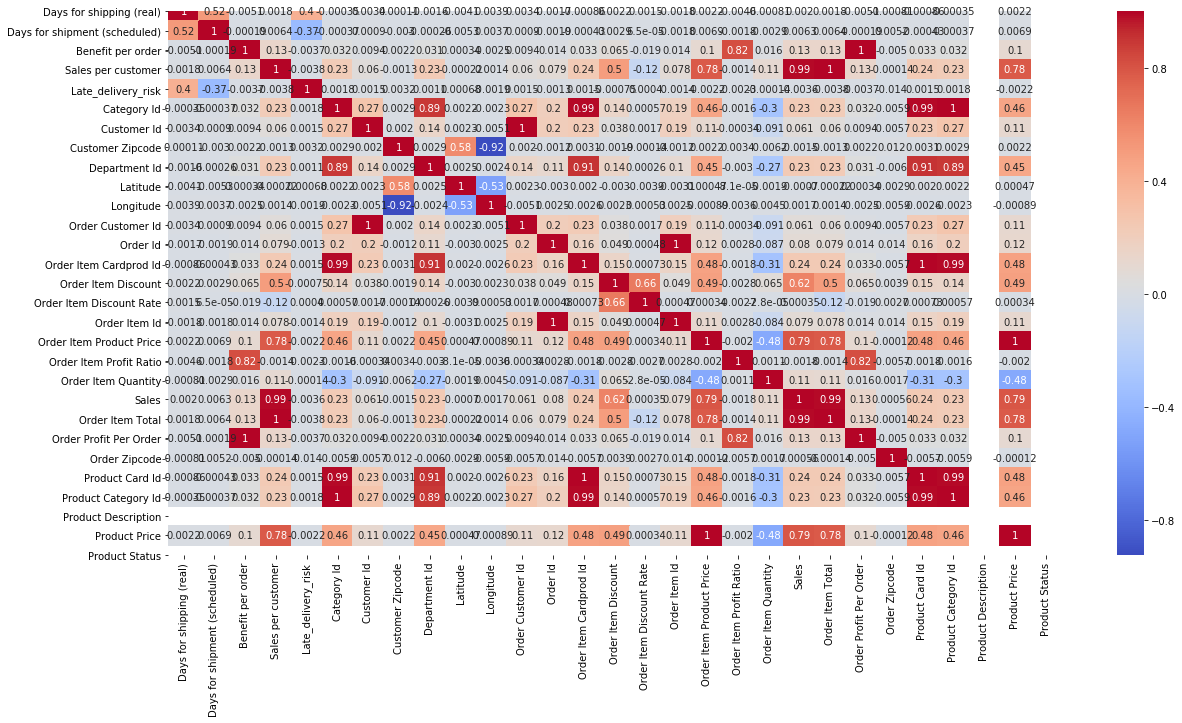

In [45]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(),annot = True,cmap = 'coolwarm')

In [49]:
#按照不同的Market，order regiopn
#基于Market
#market= data.groupby('Market')
data['Market'].value_counts()

LATAM           51594
Europe          50252
Pacific Asia    41260
USCA            25799
Africa          11614
Name: Market, dtype: int64

In [52]:
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Full Name
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class,CallyHolloway
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class,IreneLuna
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class,GillianMaldonado
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class,TanaTate
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class,OrliHendricks


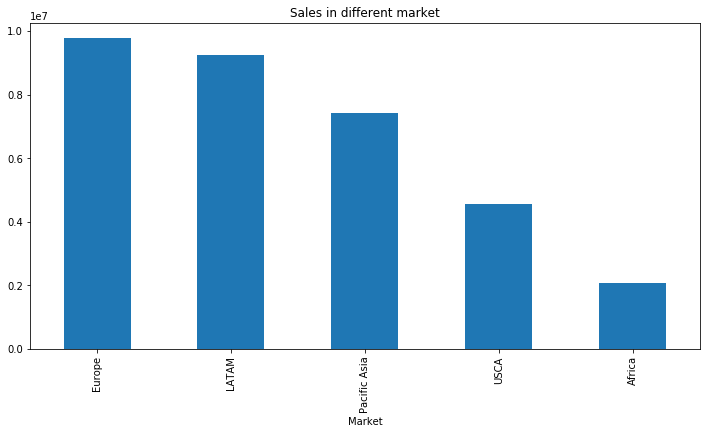

In [55]:
market = data.groupby('Market')
market['Sales per customer'].sum().sort_values(ascending = False).plot.bar(figsize = (12,6),title = 'Sales in different market')

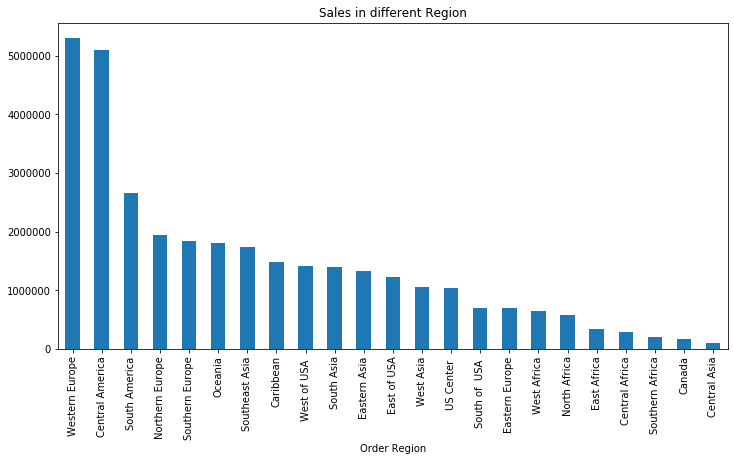

In [56]:
#order region
region = data.groupby('Order Region')
region['Sales per customer'].sum().sort_values(ascending = False).plot.bar(figsize = (12,6),title = 'Sales in different Region')

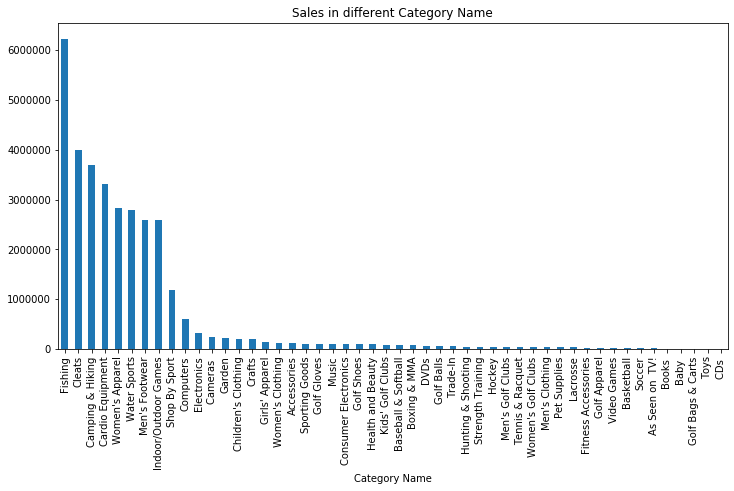

In [58]:
#按照不同的 Category Name
cat = data.groupby('Category Name') 
cat['Sales per customer'].sum().sort_values(ascending = False).plot.bar(figsize = (12,6),title = 'Sales in different Category Name')

In [61]:
#按照不同的时间维度（年，月，星期，小时）的趋势
data['order date (DateOrders)'].describe()

count               180519
unique               65752
top       10/21/2016 17:49
freq                     5
Name: order date (DateOrders), dtype: object

In [62]:
temp = pd.DatetimeIndex(data['order date (DateOrders)'])
temp

DatetimeIndex(['2018-01-31 22:56:00', '2018-01-13 12:27:00',
               '2018-01-13 12:06:00', '2018-01-13 11:45:00',
               '2018-01-13 11:24:00', '2018-01-13 11:03:00',
               '2018-01-13 10:42:00', '2018-01-13 10:21:00',
               '2018-01-13 10:00:00', '2018-01-13 09:39:00',
               ...
               '2016-01-16 06:49:00', '2016-01-16 06:49:00',
               '2016-01-16 06:28:00', '2016-01-16 06:07:00',
               '2016-01-16 05:04:00', '2016-01-16 03:40:00',
               '2016-01-16 01:34:00', '2016-01-15 21:00:00',
               '2016-01-15 20:18:00', '2016-01-15 18:54:00'],
              dtype='datetime64[ns]', name='order date (DateOrders)', length=180519, freq=None)

In [63]:
data['order_year'] = temp.year
data['order_month'] = temp.month
data['order_week_day'] = temp.weekday
data['order_hour'] = temp.hour
data['order_month_year'] = temp.to_period('M')
data[['order_year','order_month','order_week_day','order_hour','order_month_year']]

,order_year,order_month,order_week_day,order_hour,order_month_year
0,2018,1,2,22,2018-01
1,2018,1,5,12,2018-01
2,2018,1,5,12,2018-01
3,2018,1,5,11,2018-01
4,2018,1,5,11,2018-01
...,...,...,...,...,...
180514,2016,1,5,3,2016-01
180515,2016,1,5,1,2016-01
180516,2016,1,4,21,2016-01
180517,2016,1,4,20,2016-01


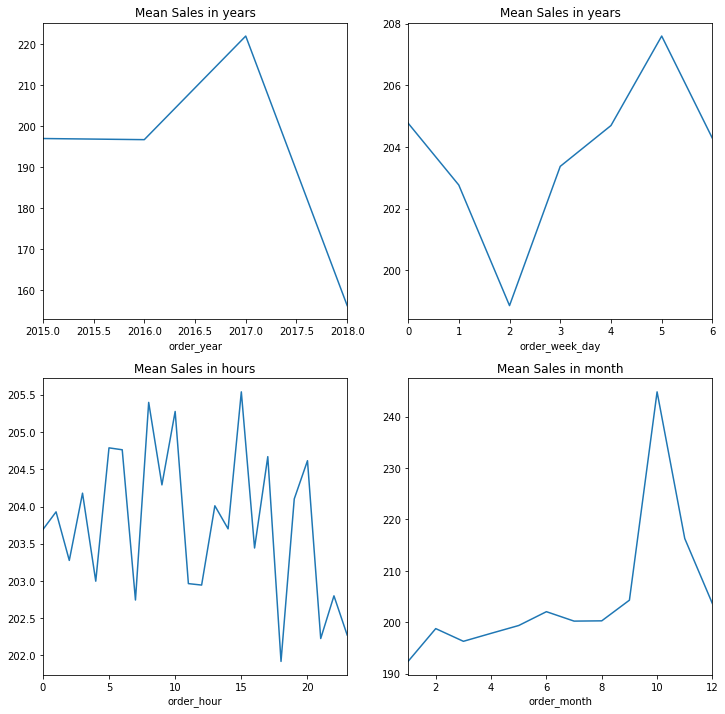

In [69]:
#Product Price与Sales per customer 相关性如何plt

plt.figure(figsize = (10,12))
plt.subplot(2,2,1)
df_year= data.groupby('order_year')
df_year['Sales'].mean().plot(figsize = (12,12),title = 'Mean Sales in years')
plt.subplot(2,2,2)
df_day= data.groupby('order_week_day')
df_day['Sales'].mean().plot(figsize = (12,12),title = 'Mean Sales in years')
plt.subplot(2,2,3)
df_hour= data.groupby('order_hour')
df_hour['Sales'].mean().plot(figsize = (12,12),title = 'Mean Sales in hours')
plt.subplot(2,2,4)
df_month= data.groupby('order_month')
df_month['Sales'].mean().plot(figsize = (12,12),title = 'Mean Sales in month')

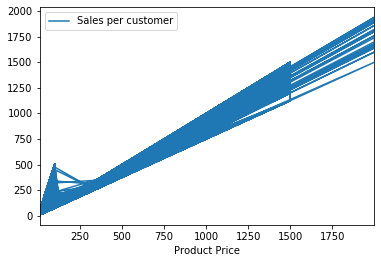

In [70]:
data.plot(x = 'Product Price',y = 'Sales per customer')